In [ ]:
 # CAR PRICE PREDICTION
# STEP 1: Import all required libraries

import pandas as pd               # for data handling
import numpy as np                # for numerical operations
from sklearn.model_selection import train_test_split  # for train-test split
from sklearn.preprocessing import StandardScaler      # for feature scaling


In [3]:
# STEP 2: Load the dataset

# Make sure the file "ml dataset project.csv" is in the same folder as your notebook
# Load dataset
df = pd.read_csv("C:/Users/hp/Downloads/ml dataset project.csv")     



# See first 5 rows to confirm it's loaded correctly
print("First 5 rows of the dataset:")
print(df.head())

# Check shape (rows, columns)
print("\nShape of dataset:", df.shape)


First 5 rows of the dataset:
   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1        3.0        alfa-romero giulia      gas        std        two   
1       2        3.0       alfa-romero stelvio      gas        std        two   
2       3        1.0  alfa-romero Quadrifoglio      gas        std        two   
3       4        2.0               audi 100 ls      gas        std       four   
4       5        2.0                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...       130.0   
1  convertible        rwd          front       88.6  ...       130.0   
2    hatchback        rwd          front       94.5  ...       152.0   
3        sedan        fwd          front       99.8  ...       109.0   
4        sedan        4wd          front       99.4  ...       136.0   

   fuelsystem  boreratio  stroke compressionratio h

In [4]:
# STEP 3: Basic checks for missing values and duplicates

# Check missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())

# If there are any duplicates, drop them
df = df.drop_duplicates().reset_index(drop=True)
print("\nShape after dropping duplicates:", df.shape)



Missing values in each column:
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Number of duplicate rows: 0

Shape after dropping duplicates: (2000, 26)


In [5]:
# STEP 4: Extract 'Brand' from 'CarName'
# Example: "toyota corolla" -> "toyota"

df['Brand'] = df['CarName'].apply(lambda x: x.split(' ')[0])

# Check new column
print("\nUnique brands (first 20):")
print(df['Brand'].unique()[:20])



Unique brands (first 20):
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault']


In [6]:
# STEP 5: Create 'CarSegment' column based on 'price'

def segment_price(price):
    if price < 10000:
        return 'Economy'
    elif price <= 20000:
        return 'Midrange'
    else:
        return 'Premium'

df['CarSegment'] = df['price'].apply(segment_price)

# Check counts of each segment
print("\nCar segment value counts:")
print(df['CarSegment'].value_counts())



Car segment value counts:
CarSegment
Economy     929
Midrange    790
Premium     281
Name: count, dtype: int64


In [7]:
# STEP 6: Select only the columns we need for the project

df_model = df[
    ['Brand',           # 1
     'fueltype',        # 2
     'aspiration',      # 3
     'doornumber',      # 4
     'carbody',         # 5
     'drivewheel',      # 6
     'enginelocation',  # 7
     'wheelbase',       # 8
     'curbweight',      # 9
     'enginesize',      # 10
     'horsepower',      # 11
     'citympg',         # 12
     'price',           # target for regression
     'CarSegment']      # target for classification
]

print("\nShape of df_model:", df_model.shape)
print("\nFirst 5 rows of df_model:")
print(df_model.head())



Shape of df_model: (2000, 14)

First 5 rows of df_model:
         Brand fueltype aspiration doornumber      carbody drivewheel  \
0  alfa-romero      gas        std        two  convertible        rwd   
1  alfa-romero      gas        std        two  convertible        rwd   
2  alfa-romero      gas        std        two    hatchback        rwd   
3         audi      gas        std       four        sedan        fwd   
4         audi      gas        std       four        sedan        4wd   

  enginelocation  wheelbase  curbweight  enginesize  horsepower  citympg  \
0          front       88.6      2548.0       130.0       111.0     21.0   
1          front       88.6      2548.0       130.0       111.0     21.0   
2          front       94.5      2823.0       152.0       154.0     19.0   
3          front       99.8      2337.0       109.0       102.0     24.0   
4          front       99.4      2824.0       136.0       115.0     18.0   

     price CarSegment  
0  13495.0   Midrange 

In [8]:
# STEP 7: One-hot encode categorical columns

cat_cols = ['Brand', 'fueltype', 'aspiration',
            'doornumber', 'carbody',
            'drivewheel', 'enginelocation']

df_encoded = pd.get_dummies(df_model, columns=cat_cols, drop_first=True)

print("\nShape after one-hot encoding:", df_encoded.shape)
print("\nFirst 5 rows after encoding:")
print(df_encoded.head())



Shape after one-hot encoding: (2000, 44)

First 5 rows after encoding:
   wheelbase  curbweight  enginesize  horsepower  citympg    price CarSegment  \
0       88.6      2548.0       130.0       111.0     21.0  13495.0   Midrange   
1       88.6      2548.0       130.0       111.0     21.0  16500.0   Midrange   
2       94.5      2823.0       152.0       154.0     19.0  16500.0   Midrange   
3       99.8      2337.0       109.0       102.0     24.0  13950.0   Midrange   
4       99.4      2824.0       136.0       115.0     18.0  17450.0   Midrange   

   Brand_alfa-romero  Brand_audi  Brand_bmw  ...  fueltype_gas  \
0               True       False      False  ...          True   
1               True       False      False  ...          True   
2               True       False      False  ...          True   
3              False        True      False  ...          True   
4              False        True      False  ...          True   

   aspiration_turbo  doornumber_two  carbody

In [9]:
# STEP 8: Define feature matrix X and targets y_reg, y_clf

# X = all columns except targets
X = df_encoded.drop(['price', 'CarSegment'], axis=1)

# Regression target: price
y_reg = df_encoded['price']

# Classification target: CarSegment
y_clf = df_encoded['CarSegment']

print("\nFeature matrix X shape:", X.shape)
print("Regression target y_reg shape:", y_reg.shape)
print("Classification target y_clf shape:", y_clf.shape)



Feature matrix X shape: (2000, 42)
Regression target y_reg shape: (2000,)
Classification target y_clf shape: (2000,)


In [10]:
# STEP 9: Train-test split for both models

# Regression split
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

# Classification split
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X, y_clf, test_size=0.2, random_state=42
)

print("\nShapes after train-test split:")
print("Xr_train:", Xr_train.shape, "Xr_test:", Xr_test.shape)
print("yr_train:", yr_train.shape, "yr_test:", yr_test.shape)
print("Xc_train:", Xc_train.shape, "Xc_test:", Xc_test.shape)
print("yc_train:", yc_train.shape, "yc_test:", yc_test.shape)



Shapes after train-test split:
Xr_train: (1600, 42) Xr_test: (400, 42)
yr_train: (1600,) yr_test: (400,)
Xc_train: (1600, 42) Xc_test: (400, 42)
yc_train: (1600,) yc_test: (400,)


In [11]:
# STEP 10: Feature scaling for numerical columns

num_cols = ['wheelbase', 'curbweight', 'enginesize',
            'horsepower', 'citympg']

# Create scaler object
scaler = StandardScaler()

# IMPORTANT: make copies to avoid warnings
Xr_train = Xr_train.copy()
Xr_test = Xr_test.copy()
Xc_train = Xc_train.copy()
Xc_test = Xc_test.copy()

# Fit scaler on training data (regression)
Xr_train[num_cols] = scaler.fit_transform(Xr_train[num_cols])

# Apply same scaling to regression test data
Xr_test[num_cols] = scaler.transform(Xr_test[num_cols])

# Apply same scaling to classification train/test
Xc_train[num_cols] = scaler.transform(Xc_train[num_cols])
Xc_test[num_cols] = scaler.transform(Xc_test[num_cols])

print("\nScaling done successfully ✅")



Scaling done successfully ✅


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set plot style
sns.set(style="whitegrid")

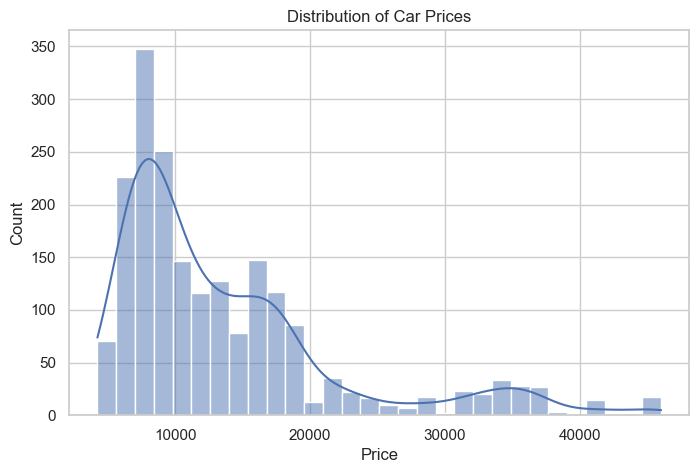

In [13]:
# STEP 3: Distribution of car prices

plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


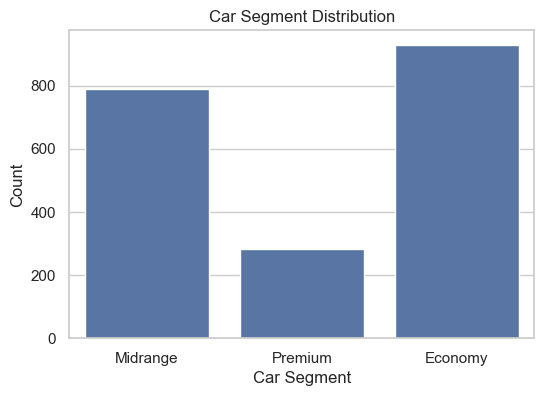

In [14]:
# Car segment count plot

plt.figure(figsize=(6,4))
sns.countplot(x='CarSegment', data=df)
plt.title("Car Segment Distribution")
plt.xlabel("Car Segment")
plt.ylabel("Count")
plt.show()


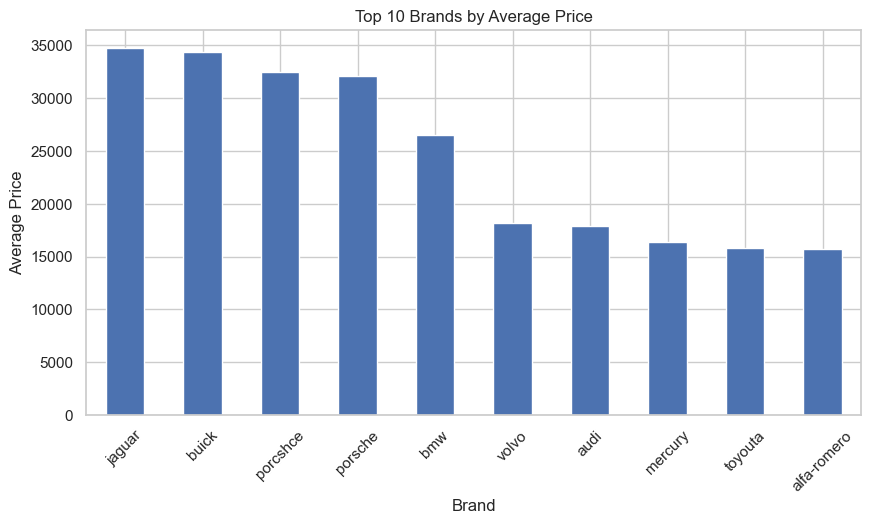

In [15]:
# STEP 5: Brand vs Price

df['Brand'] = df['CarName'].apply(lambda x: x.split(' ')[0])

top_brands = df.groupby('Brand')['price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_brands.plot(kind='bar')
plt.title("Top 10 Brands by Average Price")
plt.xlabel("Brand")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()


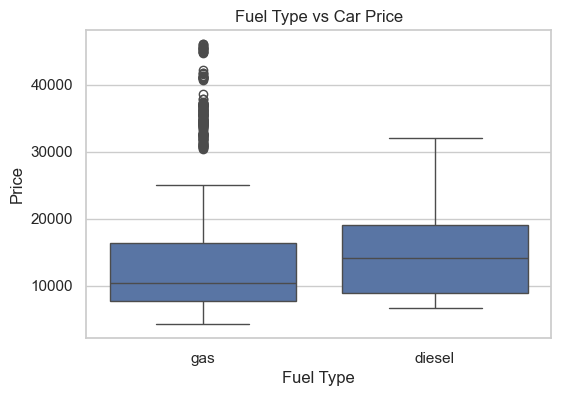

In [16]:
# STEP 6: Fuel type vs price

plt.figure(figsize=(6,4))
sns.boxplot(x='fueltype', y='price', data=df)
plt.title("Fuel Type vs Car Price")
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.show()


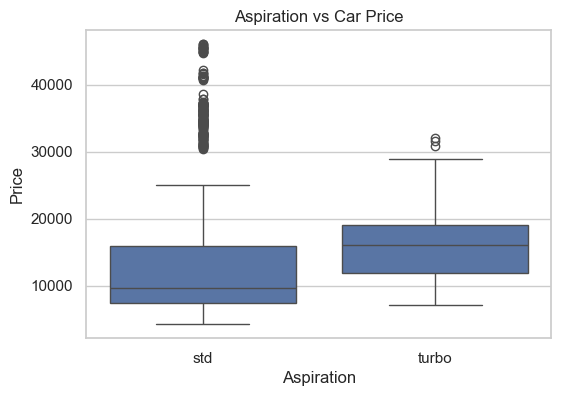

In [17]:
# STEP 7: Aspiration vs price

plt.figure(figsize=(6,4))
sns.boxplot(x='aspiration', y='price', data=df)
plt.title("Aspiration vs Car Price")
plt.xlabel("Aspiration")
plt.ylabel("Price")
plt.show()


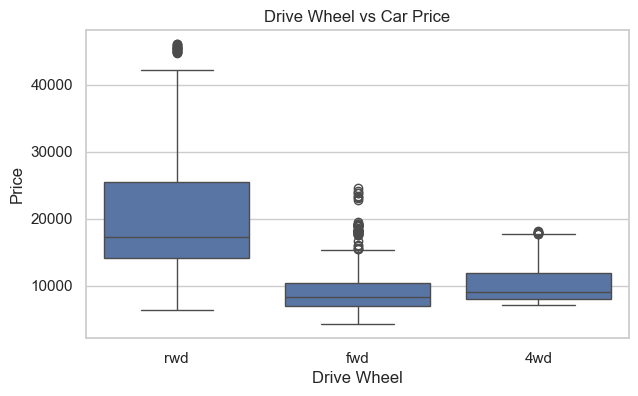

In [18]:
# STEP 8: Drive wheel vs price

plt.figure(figsize=(7,4))
sns.boxplot(x='drivewheel', y='price', data=df)
plt.title("Drive Wheel vs Car Price")
plt.xlabel("Drive Wheel")
plt.ylabel("Price")
plt.show()


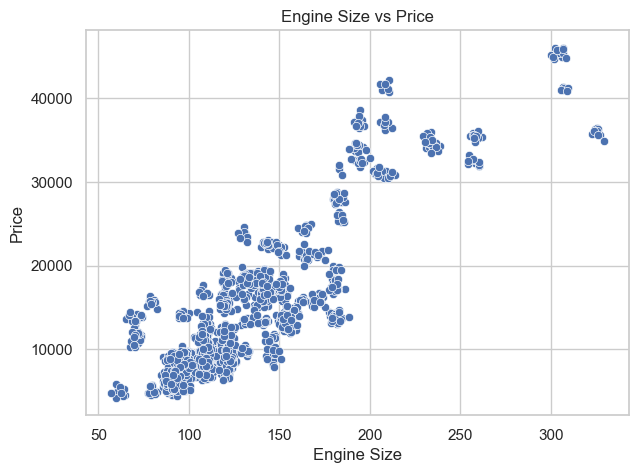

In [19]:
# STEP 9.1: Engine Size vs Price

plt.figure(figsize=(7,5))
sns.scatterplot(x='enginesize', y='price', data=df)
plt.title("Engine Size vs Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.show()


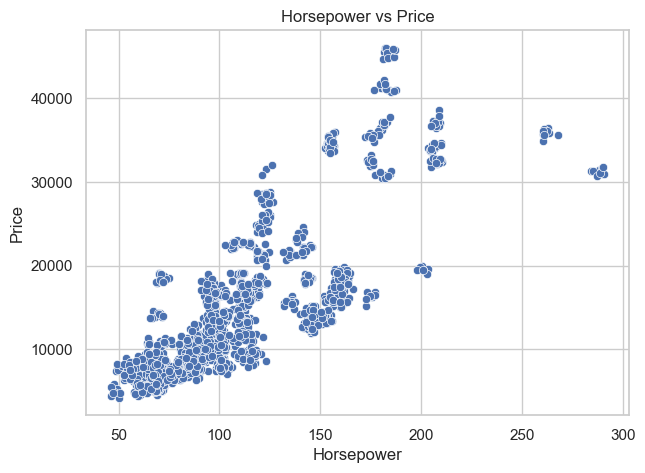

In [20]:
# STEP 9.2: Horsepower vs Price

plt.figure(figsize=(7,5))
sns.scatterplot(x='horsepower', y='price', data=df)
plt.title("Horsepower vs Price")
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.show()


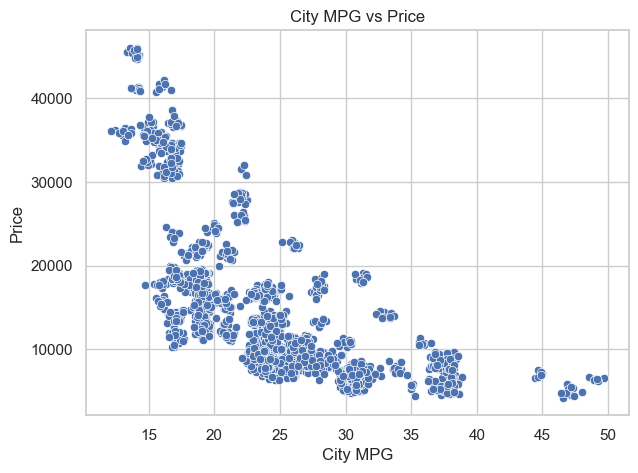

In [21]:
# STEP 9.3: City MPG vs Price

plt.figure(figsize=(7,5))
sns.scatterplot(x='citympg', y='price', data=df)
plt.title("City MPG vs Price")
plt.xlabel("City MPG")
plt.ylabel("Price")
plt.show()


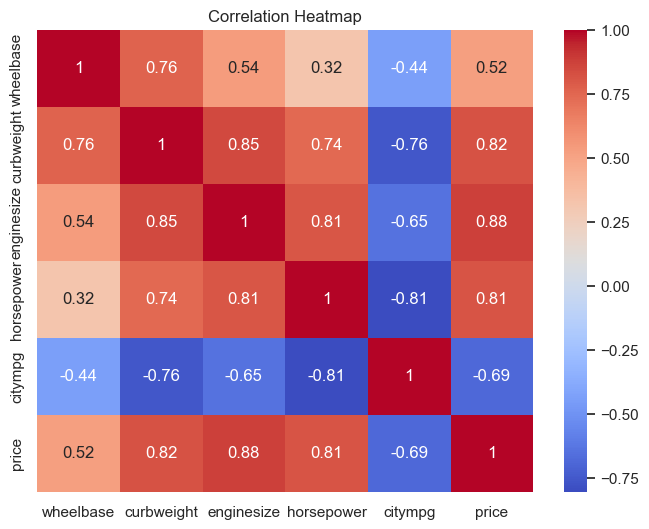

In [22]:
# STEP 10: Correlation heatmap (numerical features)

num_cols = ['wheelbase', 'curbweight', 'enginesize',
            'horsepower', 'citympg', 'price']

plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [23]:
from sklearn.model_selection import train_test_split

Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)


In [24]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X, y_clf, test_size=0.2, random_state=42
)


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create model
lr = LinearRegression()

# Train
lr.fit(Xr_train, yr_train)

# Predict
y_pred_lr = lr.predict(Xr_test)

# Evaluation
mae = mean_absolute_error(yr_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(yr_test, y_pred_lr))
r2 = r2_score(yr_test, y_pred_lr)

print("Linear Regression Results")
print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)


Linear Regression Results
MAE : 1537.7360854573908
RMSE: 2113.8330601951166
R²  : 0.9465816470529862


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create model
dt = DecisionTreeClassifier(random_state=42)

# Train
dt.fit(Xc_train, yc_train)

# Predict
y_pred_dt = dt.predict(Xc_test)

# Evaluation
print("Decision Tree Accuracy:", accuracy_score(yc_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(yc_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(yc_test, y_pred_dt))


Decision Tree Accuracy: 0.955

Classification Report:
               precision    recall  f1-score   support

     Economy       0.98      0.92      0.95       186
    Midrange       0.91      0.97      0.94       147
     Premium       1.00      1.00      1.00        67

    accuracy                           0.95       400
   macro avg       0.96      0.97      0.96       400
weighted avg       0.96      0.95      0.96       400


Confusion Matrix:
 [[172  14   0]
 [  4 143   0]
 [  0   0  67]]


In [27]:
from sklearn.neighbors import KNeighborsClassifier

# Create model
knn = KNeighborsClassifier(n_neighbors=5)

# Train
knn.fit(Xc_train, yc_train)

# Predict
y_pred_knn = knn.predict(Xc_test)

# Evaluation
print("KNN Accuracy:", accuracy_score(yc_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(yc_test, y_pred_knn))


KNN Accuracy: 0.9425

Classification Report:
               precision    recall  f1-score   support

     Economy       0.96      0.96      0.96       186
    Midrange       0.91      0.94      0.92       147
     Premium       0.98      0.91      0.95        67

    accuracy                           0.94       400
   macro avg       0.95      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



In [28]:
from sklearn.cluster import KMeans

# Create model
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit on entire feature set
kmeans.fit(X)

# Get cluster labels
clusters = kmeans.labels_

# Add cluster labels
df_kmeans = df_model.copy()
df_kmeans['Cluster'] = clusters

print(df_kmeans['Cluster'].value_counts())


Cluster
1    1154
0     677
2     169
Name: count, dtype: int64


In [29]:
from sklearn.decomposition import PCA

# Reduce to 2 dimensions
pca = PCA(n_components=2)

# Apply PCA
X_pca = pca.fit_transform(X)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.99534816 0.00344631]


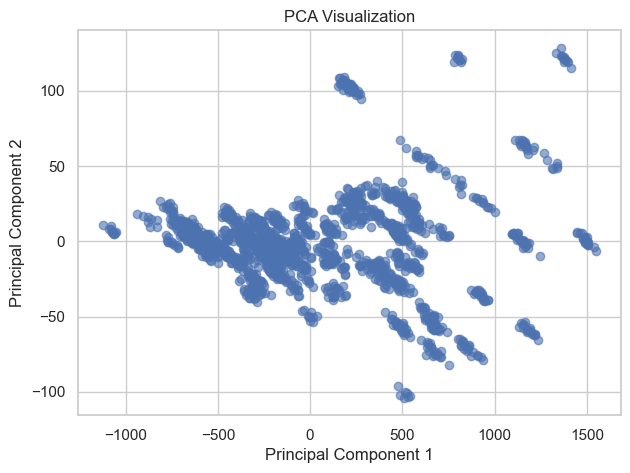

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization")
plt.show()


In [31]:
# Save training feature columns
model_features = X.columns


In [37]:
def predict_car(
    brand,
    fueltype,
    aspiration,
    doornumber,
    carbody,
    drivewheel,
    enginelocation,
    wheelbase,
    curbweight,
    enginesize,
    horsepower,
    citympg
):
    # -----------------------------
    # 1. Create input dictionary
    # -----------------------------
    input_dict = {
        'wheelbase': wheelbase,
        'curbweight': curbweight,
        'enginesize': enginesize,
        'horsepower': horsepower,
        'citympg': citympg
    }
    
    # Convert to DataFrame
    input_df = pd.DataFrame([input_dict])
    
    # -----------------------------
    # 2. Add categorical columns
    # -----------------------------
    categorical_inputs = {
        f'Brand_{brand}': 1,
        f'fueltype_{fueltype}': 1,
        f'aspiration_{aspiration}': 1,
        f'doornumber_{doornumber}': 1,
        f'carbody_{carbody}': 1,
        f'drivewheel_{drivewheel}': 1,
        f'enginelocation_{enginelocation}': 1
    }
    
    for col, val in categorical_inputs.items():
        input_df[col] = val
    
    # -----------------------------
    # 3. Align with training features
    # -----------------------------
    input_df = input_df.reindex(columns=model_features, fill_value=0)
    
    # -----------------------------
    # 4. Scale numerical features
    # -----------------------------
    num_cols = ['wheelbase', 'curbweight', 'enginesize',
                'horsepower', 'citympg']
    
    input_df[num_cols] = scaler.transform(input_df[num_cols])
    
    # -----------------------------
    # 5. Make predictions
    # -----------------------------
    predicted_price = lr.predict(input_df)[0]
    predicted_segment = dt.predict(input_df)[0]
    
    return predicted_price, predicted_segment


In [38]:
price, segment = predict_car(
    brand="toyota",
    fueltype="gas",
    aspiration="std",
    doornumber="four",
    carbody="sedan",
    drivewheel="fwd",
    enginelocation="front",
    wheelbase=95.0,
    curbweight=2200,
    enginesize=110,
    horsepower=85,
    citympg=28
)

print("Predicted Price:", round(price, 2))
print("Predicted Segment:", segment)


Predicted Price: -23907.03
Predicted Segment: Midrange
